# Derivation of Particle Swarm Optimization (PSO)

## Step 1: Introduction

Particle Swarm Optimization (PSO) is a population-based optimization algorithm inspired by the social behavior of birds flocking or fish schooling. Each particle in the swarm represents a potential solution, and the particles adjust their positions based on their own experience and the experience of their neighbors.

Let $ \mathbf{x}_i $ represent the position of particle $ i $, and $ \mathbf{v}_i $ represent its velocity in the search space. The goal of PSO is to find the optimal position of particles in a high-dimensional space that minimizes (or maximizes) an objective function.

---

## Step 2: Particle Update Rule

### Position Update
The position of each particle is updated according to the following equation:

$$
\mathbf{x}_i^{t+1} = \mathbf{x}_i^t + \mathbf{v}_i^{t+1}
$$

where:
- $ \mathbf{x}_i^t $ is the current position of particle $ i $ at iteration $ t $,
- $ \mathbf{x}_i^{t+1} $ is the updated position of particle $ i $ at iteration $ t+1 $,
- $ \mathbf{v}_i^{t+1} $ is the velocity of particle $ i $ at iteration $ t+1 $.

### Velocity Update
The velocity of each particle is updated using the following equation:

$$
\mathbf{v}_i^{t+1} = w \mathbf{v}_i^t + c_1 r_1 \left( \mathbf{p}_i^t - \mathbf{x}_i^t \right) + c_2 r_2 \left( \mathbf{g}^t - \mathbf{x}_i^t \right)
$$

where:
- $ w $ is the inertia weight, controlling the impact of the previous velocity,
- $ c_1 $ and $ c_2 $ are cognitive and social coefficients, respectively, controlling the attraction to personal and global best positions,
- $ r_1 $ and $ r_2 $ are random values between 0 and 1,
- $ \mathbf{p}_i^t $ is the personal best position of particle $ i $,
- $ \mathbf{g}^t $ is the global best position found by any particle in the swarm.

---

## Step 3: Personal Best and Global Best

At each iteration, particles compare their current positions with their previous best positions to determine if they should update their personal best:

$$
\mathbf{p}_i^{t+1} =
\begin{cases}
\mathbf{x}_i^{t+1} & \text{if } f(\mathbf{x}_i^{t+1}) < f(\mathbf{p}_i^t) \\
\mathbf{p}_i^t & \text{otherwise}
\end{cases}
$$

where $ f(\mathbf{x}) $ represents the objective function, and the best position is the one with the lowest (or highest) objective function value, depending on the optimization problem.

The global best position $ \mathbf{g}^t $ is updated similarly:

$$
\mathbf{g}^{t+1} = \arg \min_i f(\mathbf{p}_i^{t+1})
$$

This ensures that the global best position is always the position corresponding to the best objective function value among all particles.

---

## Step 4: Complete PSO Algorithm

The complete Particle Swarm Optimization algorithm proceeds as follows:

1. **Initialize** the positions and velocities of all particles randomly.
2. **Evaluate** the fitness of each particle.
3. For each particle, **update** its personal best $ \mathbf{p}_i^t $ if the current position is better.
4. **Update** the global best $ \mathbf{g}^t $ if a better position is found.
5. **Update** the velocity and position of each particle using the update rules.
6. **Repeat** steps 2-5 until a stopping criterion is met (e.g., maximum iterations or convergence).

---

## Step 5: PSO Intuition

- **Inertia** ($ w $) determines how much of the previous velocity is retained.
- **Cognitive coefficient** ($ c_1 $) makes the particle attracted to its own best position.
- **Social coefficient** ($ c_2 $) makes the particle attracted to the global best position found by the swarm.

Iteration 1/100, Best Fitness = 5.08226116
Iteration 2/100, Best Fitness = 0.37798605
Iteration 3/100, Best Fitness = 0.30996810
Iteration 4/100, Best Fitness = 0.30996810
Iteration 5/100, Best Fitness = 0.30996810
Iteration 6/100, Best Fitness = 0.11479646
Iteration 7/100, Best Fitness = 0.11479646
Iteration 8/100, Best Fitness = 0.11479646
Iteration 9/100, Best Fitness = 0.09426128
Iteration 10/100, Best Fitness = 0.09426128
Iteration 11/100, Best Fitness = 0.09426128
Iteration 12/100, Best Fitness = 0.01397904
Iteration 13/100, Best Fitness = 0.01397904
Iteration 14/100, Best Fitness = 0.01397904
Iteration 15/100, Best Fitness = 0.01397904
Iteration 16/100, Best Fitness = 0.00404066
Iteration 17/100, Best Fitness = 0.00404066
Iteration 18/100, Best Fitness = 0.00404066
Iteration 19/100, Best Fitness = 0.00404066
Iteration 20/100, Best Fitness = 0.00404066
Iteration 21/100, Best Fitness = 0.00244579
Iteration 22/100, Best Fitness = 0.00188198
Iteration 23/100, Best Fitness = 0.000720

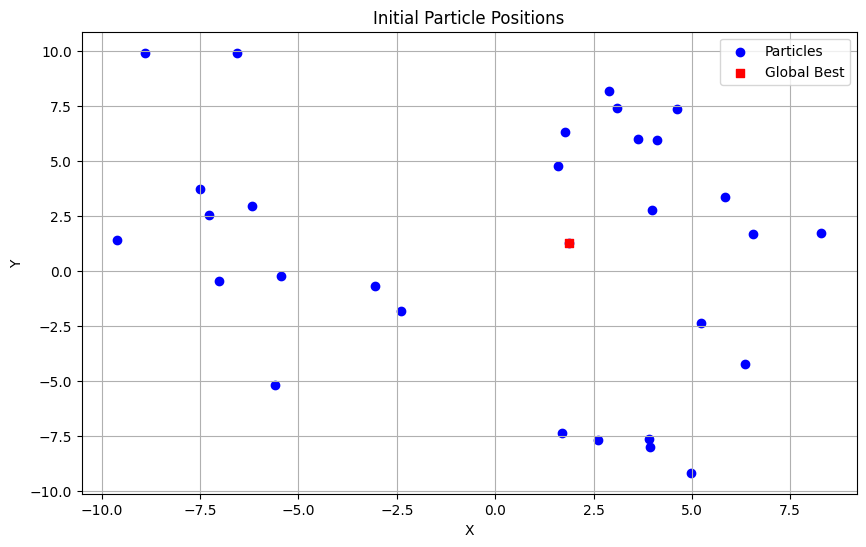

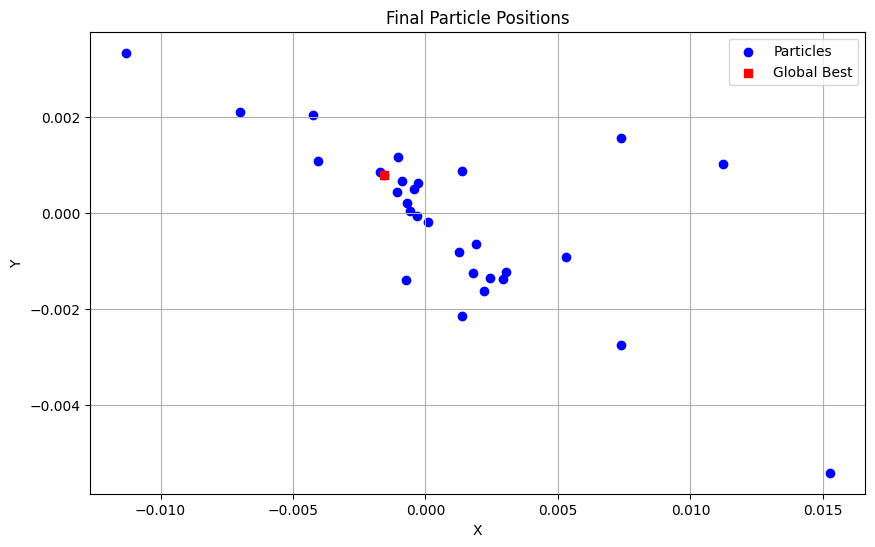

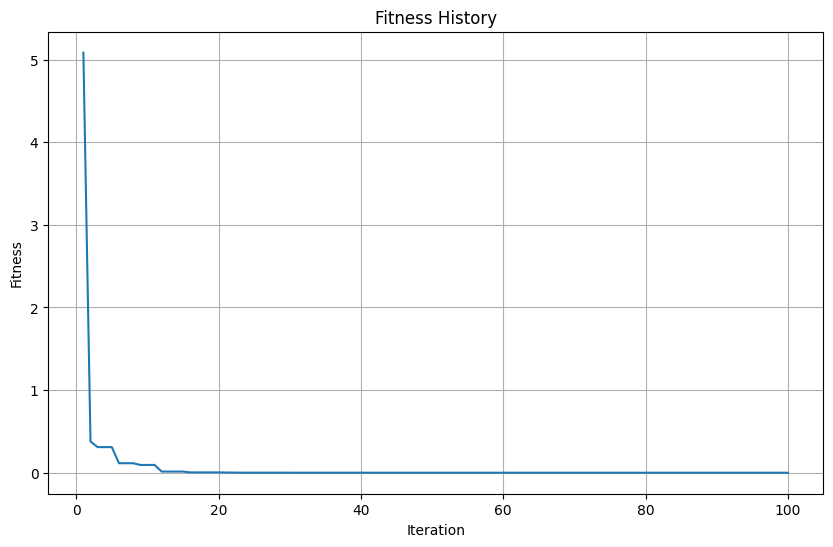

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# PSO parameters
num_particles = 30    # Number of particles
dimensions = 2        # Dimensions of the search space
iterations = 100      # Number of iterations
inertia = 0.7         # Inertia weight
cognitive = 1.5       # Cognitive coefficient
social = 1.5          # Social coefficient

# Define the fitness function (Sphere function)
def fitness_function(position):
    return np.sum(position**2)

def plot_particle_positions(particles_pos, global_best_pos, title):
    # Visualize the particle positions
    plt.figure(figsize=(10, 6))
    plt.scatter(particles_pos[:, 0], particles_pos[:, 1], c='b', label='Particles')
    plt.scatter(global_best_pos[0], global_best_pos[1], marker='s', c='r', label='Global Best')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

def plot_fitness(iterations, fitness_history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, iterations + 1), fitness_history)
    plt.xlabel("Iteration")
    plt.ylabel("Fitness")
    plt.title(title)
    plt.grid()
    plt.show()

# Initialize particles with random positions and velocities
particles_position = np.random.uniform(-10, 10, (num_particles, dimensions))
particles_velocity = np.random.uniform(-1, 1, (num_particles, dimensions))
personal_best_position = np.copy(particles_position)
personal_best_value = np.array([fitness_function(pos) for pos in particles_position])
global_best_position = personal_best_position[np.argmin(personal_best_value)]
global_best_value = np.min(personal_best_value)

# Visualize the initial particle positions
init_particles_position = particles_position.copy()
init_global_best_position = global_best_position.copy()

# Run PSO iterations
fitness_history = []
for iteration in range(iterations):
    for i in range(num_particles):
        # Calculate fitness for each particle
        fitness_value = fitness_function(particles_position[i])

        # Update personal best if the current fitness is better
        if fitness_value < personal_best_value[i]:
            personal_best_value[i] = fitness_value
            personal_best_position[i] = particles_position[i]

        # Update global best if the current fitness is the best found so far
        if fitness_value < global_best_value:
            global_best_value = fitness_value
            global_best_position = particles_position[i]

    # Update velocities and positions for each particle
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()  # Random numbers for cognitive and social components

        # Update velocity
        cognitive_velocity = cognitive * r1 * (personal_best_position[i] - particles_position[i])
        social_velocity = social * r2 * (global_best_position - particles_position[i])
        particles_velocity[i] = inertia * particles_velocity[i] + cognitive_velocity + social_velocity

        # Update position
        particles_position[i] += particles_velocity[i]

    # Append the current best fitness to the history
    fitness_history.append(global_best_value)

    # Print the best result found in each iteration
    print(f"Iteration {iteration + 1}/{iterations}, Best Fitness = {global_best_value:.8f}")

print("\nBest position found:", global_best_position)
print("Best fitness value found:", global_best_value)

# Visualize the final particle positions
plot_particle_positions(init_particles_position, init_global_best_position, "Initial Particle Positions")
plot_particle_positions(particles_position, global_best_position, "Final Particle Positions")

# Visualize the fitness history
plot_fitness(iterations, fitness_history, "Fitness History")